In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
comments = pd.read_csv(r"D:\Full Stack Data Science\Data Analytics Project\Youtube case study\dataset\1..Youtube\UScomments.csv", on_bad_lines='skip',low_memory = False)

In [3]:
comments.head()

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  
0       0  
1       0  
2       0  
3       0  
4       0

# Q1) Perform sentiment analysis

In [4]:
# Check for missing values

comments.isnull().sum()

video_id         0
comment_text    25
likes            0
replies          0
dtype: int64

In [5]:
# Drop all the missing valuse

comments.dropna(inplace = True)

In [6]:
!pip install textblob

In [7]:
from textblob import TextBlob

In [8]:
TextBlob("trending 😉").sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [9]:
TextBlob("trending 😉").sentiment.polarity

0.0

In [10]:
polarity = []
for comment in comments['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [11]:
comments['polarity']=polarity
comments.head(12)

video_id                                       comment_text likes  \
0   XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1   XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2   XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3   XpVt6Z1Gjjo                                MY FAN . attendance     3   
4   XpVt6Z1Gjjo                                         trending 😉     3   
5   XpVt6Z1Gjjo                            #1 on trending AYYEEEEE     3   
6   XpVt6Z1Gjjo                               The end though 😭👍🏻❤️     4   
7   XpVt6Z1Gjjo                               #1 trending!!!!!!!!!     3   
8   XpVt6Z1Gjjo                        Happy one year vlogaversary     3   
9   XpVt6Z1Gjjo  You and your shit brother may have single hand...     0   
10  XpVt6Z1Gjjo             There should be a mini Logan Paul too!     0   
11  XpVt6Z1Gjjo  Dear Logan, I really wanna get your Merch but ...     0   

   replies  polarity  
0        0  0.000000  
1        0  0.000000  
2        0  0.000000  
3        0  0.000000  
4        0  0.000000  
5        0  0.000000  
6        0  0.000000  
7        0  0.000000  
8        0  0.800000  
9        0 -0.135714  
10       0  0.000000  
11       0  0.200000

# Q2 WordCloud Representation

In [12]:
# Extract all the positive comments

comments_positive = comments[comments['polarity'] == 1]
comments_positive.head()

video_id                                       comment_text likes  \
64   XpVt6Z1Gjjo                                    yu are the best     1   
156  cLdxuaxaQwc  Power is the disease.  Care is the cure.  Keep...     0   
227  WYYvHb03Eog  YAS Can't wait to get it! I just need to sell ...     0   
307  sjlHnJvXdQs                                  This is priceless     0   
319  sjlHnJvXdQs                                Summed up perfectly     0   

    replies  polarity  
64        0       1.0  
156       0       1.0  
227       0       1.0  
307       0       1.0  
319       0       1.0

In [13]:
# Extract all the negative comments

comments_negative = comments[comments['polarity'] == -1]
comments_negative.head()

video_id                                       comment_text likes  \
512   8wNr-NQImFg  BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...     0   
562   8wNr-NQImFg  Well… The brain surgeon Ben Carson just proved...     0   
952   Ayb_2qbZHm4         WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!     0   
1371  vu_9muoxT50                                     WTF BRUH!!!!!!     0   
1391  vu_9muoxT50                    cheeseus christ thats insane!!!     0   

     replies  polarity  
512        0      -1.0  
562        0      -1.0  
952        0      -1.0  
1371       0      -1.0  
1391       0      -1.0

In [14]:
!pip install wordcloud

In [15]:
from wordcloud import WordCloud, STOPWORDS

In [16]:
# These are all the negative comments
comments_negative['comment_text']

512       BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...
562       Well… The brain surgeon Ben Carson just proved...
952              WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!
1371                                         WTF BRUH!!!!!!
1391                        cheeseus christ thats insane!!!
                                ...                        
690788                                  Like Kelly she evil
690865                       R U FUCKING KIDDING ME?!?!?!?!
691073             This is horribly offensive please report
691180    Sink holes looks terrifying sinkholes sink you...
691224    Trump talked to the president of US Virgin Isl...
Name: comment_text, Length: 3508, dtype: object

In [17]:
total_negative_comments = ' '.join(comments_negative['comment_text'])

## • This are the most negative words used in the comments

(-0.5, 399.5, 199.5, -0.5)

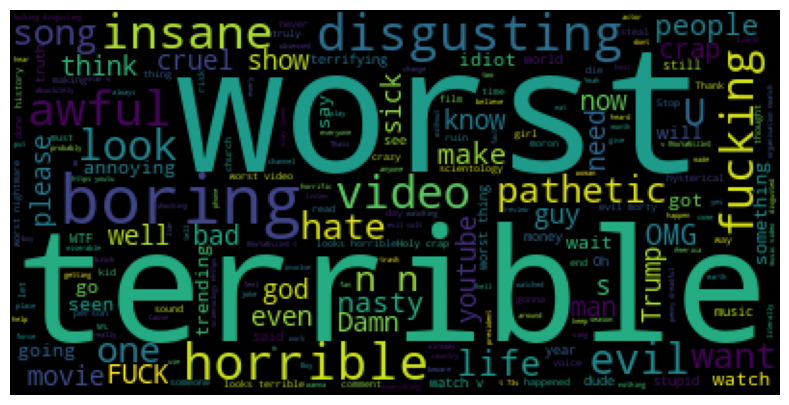

In [18]:
words = WordCloud(stopwords=set(STOPWORDS)).generate(total_negative_comments)
plt.figure(figsize = (15,5))
plt.imshow(words)
plt.axis('off')

## • These are the most used positive words used in comments

In [19]:
total_positive_comments = ' '.join(comments_positive['comment_text'])

(-0.5, 399.5, 199.5, -0.5)

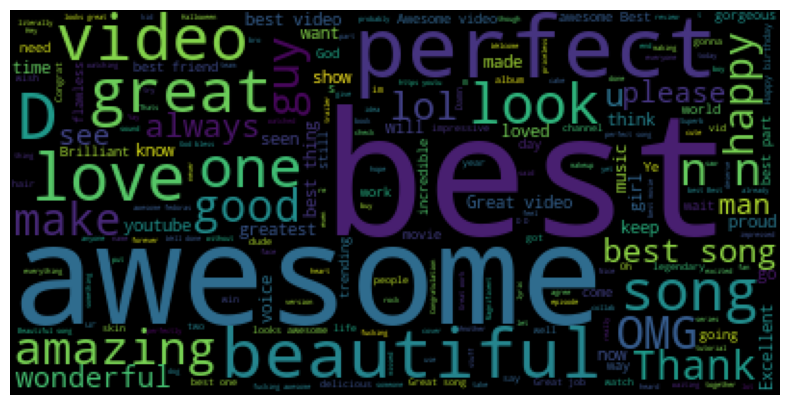

In [20]:
words = WordCloud(stopwords=set(STOPWORDS)).generate(total_positive_comments)
plt.figure(figsize = (15,5))
plt.imshow(words)
plt.axis('off')

# Q3) Emoji Analysis

In [21]:
!pip install emoji

In [22]:
import emoji

In [23]:
comments.head(14)

video_id                                       comment_text likes  \
0   XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1   XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2   XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3   XpVt6Z1Gjjo                                MY FAN . attendance     3   
4   XpVt6Z1Gjjo                                         trending 😉     3   
5   XpVt6Z1Gjjo                            #1 on trending AYYEEEEE     3   
6   XpVt6Z1Gjjo                               The end though 😭👍🏻❤️     4   
7   XpVt6Z1Gjjo                               #1 trending!!!!!!!!!     3   
8   XpVt6Z1Gjjo                        Happy one year vlogaversary     3   
9   XpVt6Z1Gjjo  You and your shit brother may have single hand...     0   
10  XpVt6Z1Gjjo             There should be a mini Logan Paul too!     0   
11  XpVt6Z1Gjjo  Dear Logan, I really wanna get your Merch but ...     0   
12  XpVt6Z1Gjjo  Honestly Evan is so annoying. Like its not fun...     0   
13  XpVt6Z1Gjjo                   Casey is still better then logan     0   

   replies  polarity  
0        0  0.000000  
1        0  0.000000  
2        0  0.000000  
3        0  0.000000  
4        0  0.000000  
5        0  0.000000  
6        0  0.000000  
7        0  0.000000  
8        0  0.800000  
9        0 -0.135714  
10       0  0.000000  
11       0  0.200000  
12       0 -0.023333  
13       0  0.500000

In [24]:
# This is the unicode for the emoji

print('\U0001F600')

😀


In [25]:
comment = 'trending 😉'
comment

'trending 😉'

In [26]:
[c for c in comment if c in emoji.EMOJI_DATA]

['😉']

In [27]:
# Extrace emoji from the data and append it into a list

emoji_list = []
for comment in comments['comment_text']:
    for char in comment:
        if char in emoji.EMOJI_DATA:
            emoji_list.append(char)

In [28]:
# This is total number of emoji available in our data
len(emoji_list)

294549

In [29]:
# These are my first 10 emojis

emoji_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [30]:
from collections import Counter

In [31]:
# Here we got the dictionary

Counter(emoji_list)

Counter({'‼': 211,
         '😉': 998,
         '😭': 8398,
         '👍': 5476,
         '🏻': 3438,
         '❤': 31119,
         '😍': 33453,
         '💋': 968,
         '💙': 2831,
         '👈': 126,
         '😂': 36987,
         '🔥': 8694,
         '👻': 268,
         '💎': 316,
         '😆': 1149,
         '😁': 2220,
         '😒': 629,
         '👏': 5719,
         '😊': 3596,
         '👌': 3112,
         '🤔': 1592,
         '💔': 617,
         '👎': 673,
         '🍎': 49,
         '😤': 378,
         '😢': 2672,
         '👫': 33,
         '💘': 702,
         '😻': 1409,
         '💖': 5359,
         '🌟': 549,
         '😮': 1232,
         '👇': 151,
         '😳': 398,
         '😠': 599,
         '😴': 187,
         '😝': 413,
         '™': 46,
         '☺': 1180,
         '😔': 545,
         '😩': 1472,
         '😡': 478,
         '🙏': 1818,
         '😄': 1496,
         '😬': 3381,
         '☹': 173,
         '🤷': 334,
         '🤣': 2279,
         '😃': 1235,
         '🏽': 1593,
         '🍏': 56,
      

In [32]:
# Now to find the top 10 emoji

Counter(emoji_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

### • Now store all the key into the one list and value(counter) in another list

In [33]:
# Now to acess only key

Counter(emoji_list).most_common(10)[1][0]

'😍'

In [34]:
# Here we store all the top 10 emojis into one list

emojis = [Counter(emoji_list).most_common(10)[i][0] for i in range(10)]
emojis

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [35]:
# Here we store all the frequency of the emoji into another list

freqs = [Counter(emoji_list).most_common(10)[i][1] for i in range(10)]
freqs

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [36]:
!pip install kaleido

In [37]:
import plotly.express as px

In [38]:
from plotly.offline import iplot
from IPython.display import Image

### • Here you can see the most used emojis by the users

In [39]:
fig = px.bar(comments['comment_text'], x = emojis, y = freqs)
fig.update_layout(xaxis_title = 'emoji', yaxis_title = 'count')
fig.update_layout(title='Top-10 most used emoji')

fig.write_image(r'D:\Full Stack Data Science\Data Analytics Project\Youtube case study\images\Top10_emoji.jpeg', width=1280,height=720,engine='kaleido',scale=2)
Image(fig.to_image(format='png',width=1280,height=720,engine='kaleido',scale=2))

fig.show()

# Q4) Collect the entire data of the youtube

In [40]:
import os

In [41]:
path = r"D:\Full Stack Data Science\Data Analytics Project\Youtube case study\dataset\1..Youtube\additional_data"

In [42]:
# Here we get list of available directory in our current path

files = os.listdir(path)
files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

In [43]:
# To extract only csv files

for i in range(0, len(files),2):
    print(i)

0
2
4
6
8
10
12
14
16
18


In [44]:
files_csv = [files[i] for i in range(0, len(files),2)]
files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [45]:
files_csv[0].split('.')[0][0:2]

'CA'

In [46]:
files_csv[0][0:2]

'CA'

In [47]:
# Now we can see their is a country name itself in the file name
# so we have to extract those country name from the file name
# we use iso-8859-1 because we also have japanese data in the dataset

full_df = pd.DataFrame()
for file in files_csv:
    current_df = pd.read_csv(path + '/' + file, encoding='iso-8859-1', on_bad_lines= 'skip')
    current_df['country'] = files_csv[0][0:2]
    full_df = pd.concat([full_df , current_df])

In [48]:
full_df.head()

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4     21082          85067  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description country  
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...      CA  
1  STill got a lot of packages. Probably will las...      CA  
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...      CA  
3  I know it's been a while since we did this sho...      CA  
4  ð§: https://ad.gt/yt-perfect\nð°: https://...      CA

In [49]:
#(no of rows, no of columns)

full_df.shape

(375942, 17)

# Q5) Which Category has the maximum likes ?

In [50]:
full_df['category_id'].unique()

array([10, 23, 24, 25, 22, 26,  1, 28, 20, 17, 29, 15, 19,  2, 27, 43, 30,
       44], dtype=int64)

In [51]:
cat = pd.read_csv(r"D:\Full Stack Data Science\Data Analytics Project\Youtube case study\dataset\1..Youtube\category_file.txt",sep = ': \t\t',engine = 'python')
cat

Category_id      Category_name
1                Film & Animation
2                Autos & Vehicles
10                          Music
15                 Pets & Animals
17                         Sports
18                   Short Movies
19                Travel & Events
20                         Gaming
21                  Videoblogging
22                 People & Blogs
23                         Comedy
24                  Entertainment
25                News & Politics
26                  Howto & Style
27                      Education
28           Science & Technology
29          Nonprofits & Activism
30                         Movies
31                Anime/Animation
32               Action/Adventure
33                       Classics
34                         Comedy
35                    Documentary
36                          Drama
37                         Family
38                        Foreign
39                         Horror
40                 Sci-Fi/Fantasy
41                       Thriller
42                         Shorts
43                          Shows
44                       Trailers

In [52]:
# Now reset the index

cat.reset_index(inplace = True)
cat

index Category_id      Category_name
0       1               Film & Animation
1       2               Autos & Vehicles
2      10                          Music
3      15                 Pets & Animals
4      17                         Sports
5      18                   Short Movies
6      19                Travel & Events
7      20                         Gaming
8      21                  Videoblogging
9      22                 People & Blogs
10     23                         Comedy
11     24                  Entertainment
12     25                News & Politics
13     26                  Howto & Style
14     27                      Education
15     28           Science & Technology
16     29          Nonprofits & Activism
17     30                         Movies
18     31                Anime/Animation
19     32               Action/Adventure
20     33                       Classics
21     34                         Comedy
22     35                    Documentary
23     36                          Drama
24     37                         Family
25     38                        Foreign
26     39                         Horror
27     40                 Sci-Fi/Fantasy
28     41                       Thriller
29     42                         Shorts
30     43                          Shows
31     44                       Trailers

In [53]:
# name columns
cat.columns = ['category_id', 'category_name']
cat

category_id          category_name
0             1       Film & Animation
1             2       Autos & Vehicles
2            10                  Music
3            15         Pets & Animals
4            17                 Sports
5            18           Short Movies
6            19        Travel & Events
7            20                 Gaming
8            21          Videoblogging
9            22         People & Blogs
10           23                 Comedy
11           24          Entertainment
12           25        News & Politics
13           26          Howto & Style
14           27              Education
15           28   Science & Technology
16           29  Nonprofits & Activism
17           30                 Movies
18           31        Anime/Animation
19           32       Action/Adventure
20           33               Classics
21           34                 Comedy
22           35            Documentary
23           36                  Drama
24           37                 Family
25           38                Foreign
26           39                 Horror
27           40         Sci-Fi/Fantasy
28           41               Thriller
29           42                 Shorts
30           43                  Shows
31           44               Trailers

In [54]:
# make category_id as an index

cat.set_index('category_id', inplace = True)
cat

category_name
category_id                       
1                 Film & Animation
2                 Autos & Vehicles
10                           Music
15                  Pets & Animals
17                          Sports
18                    Short Movies
19                 Travel & Events
20                          Gaming
21                   Videoblogging
22                  People & Blogs
23                          Comedy
24                   Entertainment
25                 News & Politics
26                   Howto & Style
27                       Education
28            Science & Technology
29           Nonprofits & Activism
30                          Movies
31                 Anime/Animation
32                Action/Adventure
33                        Classics
34                          Comedy
35                     Documentary
36                           Drama
37                          Family
38                         Foreign
39                          Horror
40                  Sci-Fi/Fantasy
41                        Thriller
42                          Shorts
43                           Shows
44                        Trailers

## • Note
    Now we can extract category_name with the help of category_id.
    so we have to convert the entire data into dictionary.
    so that we can map this dictionary on top of our category_id feature.
    Hence we will get all the category_name

In [55]:
# Convert the entire data into dictionary

dict = cat.to_dict()
dict['category_name']

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [56]:
# Now mark above dictionary on top of the category_id feature

full_df['category_name'] = full_df['category_id'].map(dict['category_name'])

In [57]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', 'category_name'],
      dtype='object')

In [58]:
full_df.head(3)

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   

                                                tags     views   likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651  127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434  146035   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   

                                         description country category_name  
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...      CA         Music  
1  STill got a lot of packages. Probably will las...      CA        Comedy  
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...      CA        Comedy

<AxesSubplot:xlabel='category_name', ylabel='likes'>

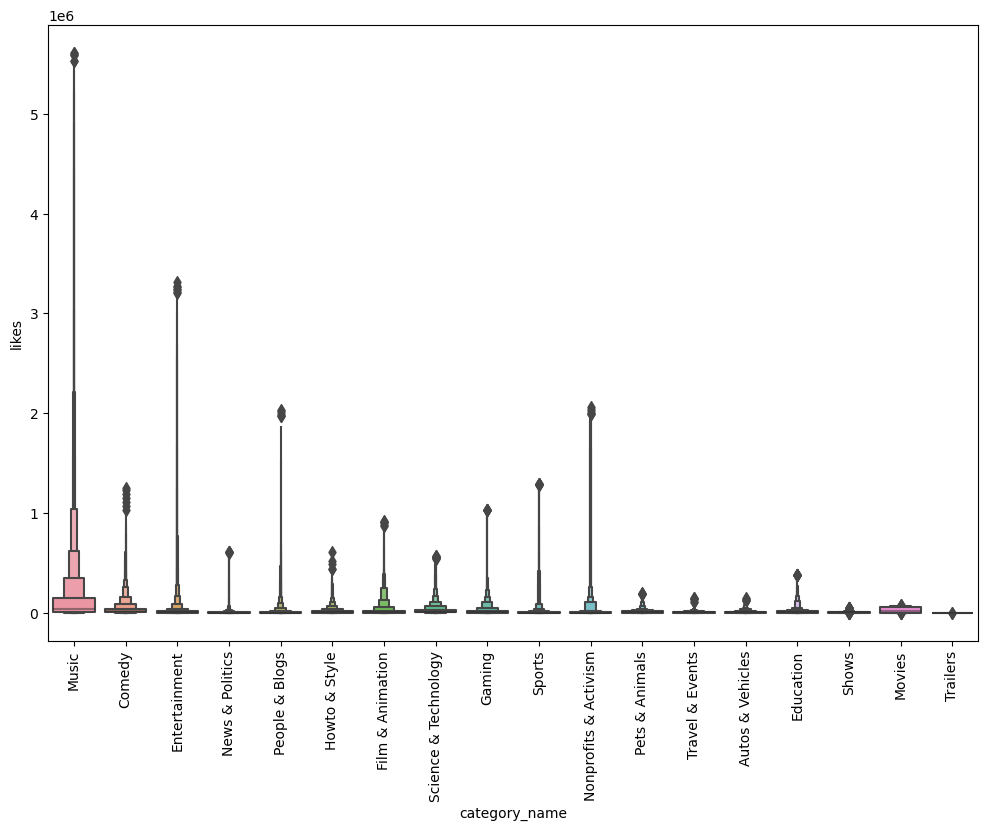

In [59]:
plt.figure(figsize=(12,8))
plt.xticks(rotation = 'vertical')
sns.boxenplot(x = 'category_name', y = 'likes', data = full_df)

## • Conclusion:
    Here we can see their are lot of auidance who likes music videos

# Q6) Lets find out whether audiance is engaged or not

    To find weather auidance is engaged or not we have to find like rate, dislike rate and comment rate of any video

In [60]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', 'category_name'],
      dtype='object')

In [61]:
# Here we created like rate, dislike rate, comment count rate

full_df['like_rate']=(full_df['likes']/full_df['views'])*100
full_df['dislike_rate'] = (full_df['dislikes']/full_df['views'])*100
full_df['comment_count_rate'] = (full_df['comment_count']/full_df['views'])*100

In [62]:
full_df.head(3)

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   

                                                tags     views   likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651  127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434  146035   

   dislikes  ...                                  thumbnail_link  \
0     43420  ...  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688  ...  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339  ...  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   

  comments_disabled  ratings_disabled  video_error_or_removed  \
0             False             False                   False   
1             False             False                   False   
2             False             False                   False   

                                         description country category_name  \
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...      CA         Music   
1  STill got a lot of packages. Probably will las...      CA        Comedy   
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...      CA        Comedy   

   like_rate  dislike_rate  comment_count_rate  
0   4.589104      0.253051            0.733639  
1  12.594873      0.166363            1.284185  
2   4.575843      0.167292            0.256342  

[3 rows x 21 columns]

<AxesSubplot:xlabel='category_name', ylabel='like_rate'>

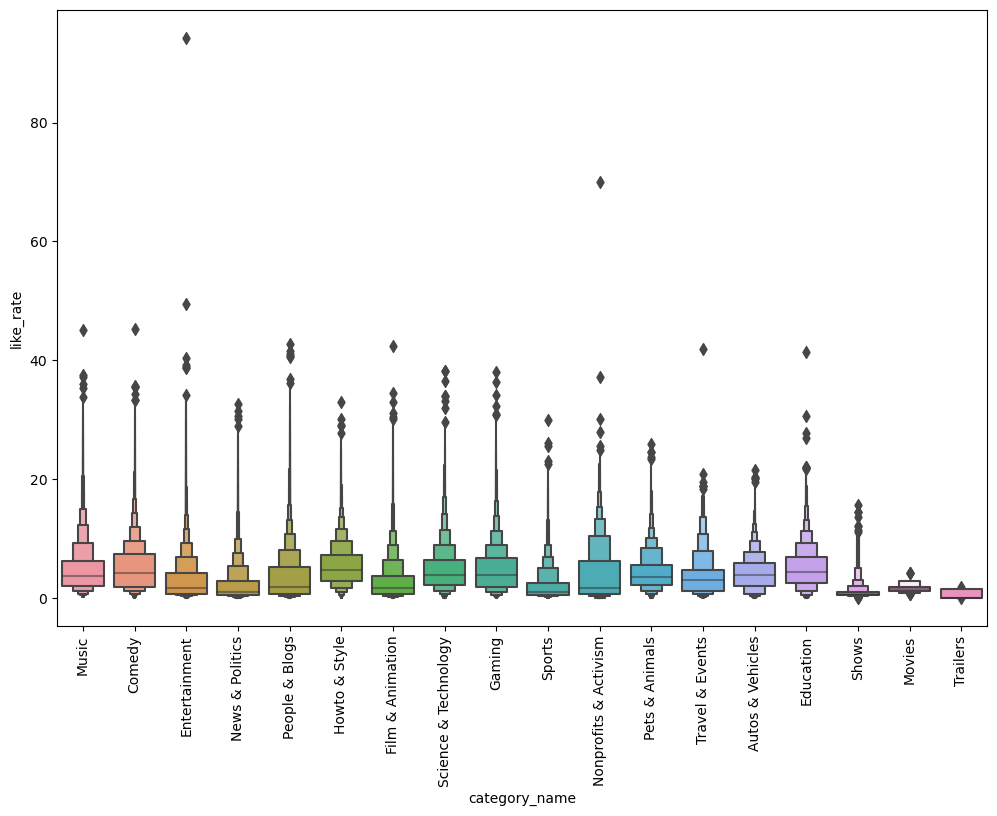

In [63]:
# Here we are plotting like_rate
plt.figure(figsize=(12,8))
plt.xticks(rotation = 'vertical')
sns.boxenplot(x = 'category_name', y = 'like_rate', data = full_df)

### • Conclusion:
    Here you can see according to boxplot music, comedy, science technology
    are the top category where audiance are engaging

# Q7) Analysi whether views affects likes or not

    core idea is we have to find relation between the views and likes,
    if their is a higher correlation value which is close to 1 
    eg- 0.8, 0.9, 0.7 ... then their is a higher probablity that if any
    video has a higher number of the views then it may have the higher
    number of the likes

<AxesSubplot:xlabel='views', ylabel='likes'>

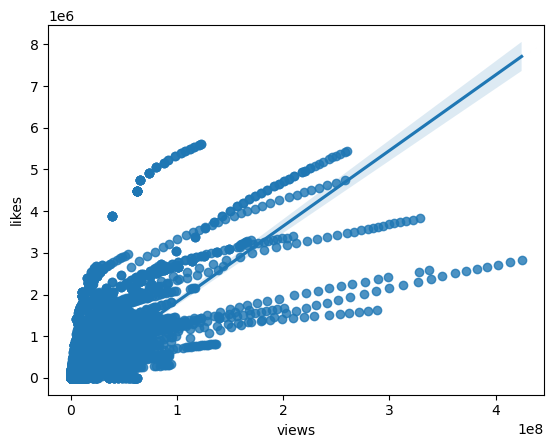

In [64]:
sns.regplot(data=full_df, x = 'views', y = 'likes')

In [65]:
# To cross check we use corelation matrix

full_df[['views','likes', 'dislikes']].corr()


views     likes  dislikes
views     1.000000  0.777796  0.421653
likes     0.777796  1.000000  0.453710
dislikes  0.421653  0.453710  1.000000

## • Explaination:
    The strainght line is regration line
    
     These are all the correlation values
     as you can see that:
         on views 1.0, likes 0.7
         on views  0.7, likes 1.0
    
     from this you can say views and likes has higher correlation values
     which mean as number of views increase than probability of likes has        also

<AxesSubplot:>

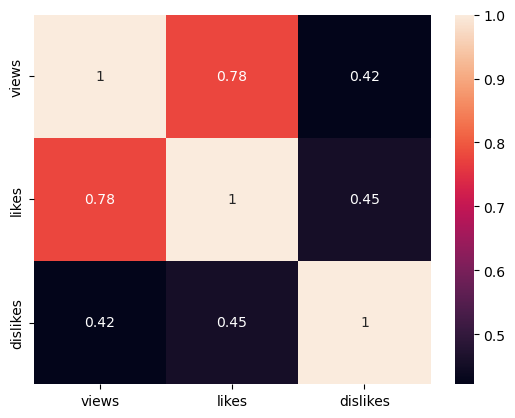

In [66]:
# using heatmap to show this correlatio

sns.heatmap(full_df[['views','likes', 'dislikes']].corr(),annot=True)

# Q8) Analyzing which channels has the largest count of trending videos

In [67]:
full_df.head(3)

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   

                                                tags     views   likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579  787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651  127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434  146035   

   dislikes  ...                                  thumbnail_link  \
0     43420  ...  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688  ...  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339  ...  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   

  comments_disabled  ratings_disabled  video_error_or_removed  \
0             False             False                   False   
1             False             False                   False   
2             False             False                   False   

                                         description country category_name  \
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...      CA         Music   
1  STill got a lot of packages. Probably will las...      CA        Comedy   
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...      CA        Comedy   

   like_rate  dislike_rate  comment_count_rate  
0   4.589104      0.253051            0.733639  
1  12.594873      0.166363            1.284185  
2   4.575843      0.167292            0.256342  

[3 rows x 21 columns]

In [68]:
# Here is a data of channel which have number of video available in that channel

full_df.groupby('channel_title')['video_id'].count().sort_values(ascending = False)

channel_title
The Late Show with Stephen Colbert    984
WWE                                   804
Late Night with Seth Meyers           773
VikatanTV                             763
TheEllenShow                          743
                                     ... 
LIGHTS - 001 jrny                       1
bangtanist                              1
LIGAMX Femenil                          1
LIGA COLOMBIANA OFICIAL                 1
Pavel Sidorik TV                        1
Name: video_id, Length: 37824, dtype: int64

In [69]:
# Convert all the above values into data structure
# reset index using reset_index() fun

full_df.groupby('channel_title')['video_id'].count().sort_values(ascending = False).to_frame().reset_index()

channel_title  video_id
0      The Late Show with Stephen Colbert       984
1                                     WWE       804
2             Late Night with Seth Meyers       773
3                               VikatanTV       763
4                            TheEllenShow       743
...                                   ...       ...
37819                   LIGHTS - 001 jrny         1
37820                          bangtanist         1
37821                      LIGAMX Femenil         1
37822             LIGA COLOMBIANA OFICIAL         1
37823                    Pavel Sidorik TV         1

[37824 rows x 2 columns]

In [70]:
# Now Manipulate column name 'video_id' as 'total_videos' and convert it into dataframe

top_trending_channels = full_df.groupby('channel_title')['video_id'].count().sort_values(ascending = False).to_frame().reset_index().rename(columns= {'video_id':'total_videos'})
top_trending_channels.head(5)

channel_title  total_videos
0  The Late Show with Stephen Colbert           984
1                                 WWE           804
2         Late Night with Seth Meyers           773
3                           VikatanTV           763
4                        TheEllenShow           743

In [71]:
# Now visualise top 20 channel title from above dataframe cdf
# WE are using bar chart

import plotly.express as plty

fig = px.bar(data_frame=top_trending_channels[0:20],x='channel_title',y='total_videos')
fig.update_layout(title='Top20 channel')
fig.write_image(r'D:\Full Stack Data Science\Data Analytics Project\Youtube case study\images\Top20_channel_MostTrending_videos.jpeg', width=1280,height=720,engine='kaleido',scale=2)
Image(fig.to_image(format='png',width=1280,height=720,engine='kaleido',scale=2))


fig.show()

## • Conclusion:
    These are top20 channels which has most trending videos.
    and hence the most trending video channel is 'The Late Show with           Stephan Colbert'

# Q10) Find whether Punctuation in title and tags impacts on views, likes, dislikes and comments.

    which means finds if more the punctuation in channel title will it         increase likes, dislikes, or comments i.e more the punctuation is their 
    any chance weather that particular channel will grow or not

In [72]:
import string

In [73]:
# Here are some punctuation which are present in string module

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [74]:
# Create a function which will return count of the punctuation that we have in any text

def punc_count(x):
    return len([c for c in x if c in string.punctuation])

In [75]:
# These are all the data of title present in dataframe at 0th index

full_df['title'][0]

0          Eminem - Walk On Water (Audio) ft. BeyoncÃ©
0    Sing zu Ende! | Gesangseinlagen vom Feinsten |...
0             Malika LePen : Femme de Gauche - Trailer
0        John Lewis Christmas Ad 2017 - #MozTheMonster
0    Sharry Mann: Cute Munda ( Song Teaser) | Parmi...
0    é¸èªããªãåç´ã«è½ä¸ï¼è·¯ä¸ã®è»ã...
0             ì¢ì by ë¯¼ì_ì¤ì¢
ì _ì¢ë ëµê°
0                       CapÃ­tulo 12 | MasterChef 2017
0    ÐÐ°Ñ
Ð°Ñ Ð¸ ÐÐ¾Ð»Ð¸Ð½Ð° ÑÑÐ°ÑÑÑ ÑÐºÐ¾...
0                   WE WANT TO TALK ABOUT OUR MARRIAGE
Name: title, dtype: object

In [76]:
# here a small example, we can see that we get count of total number of
# punctuation present in this title string

text = 'Eminem - Walk On Water (Audio) ft. BeyoncÃ©'
punc_count(text)

4

In [77]:
# Similary apply this function on top of the dataframe

full_df['count_punctuation'] = full_df['title'].apply(punc_count)

full_df.head()

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   

                                               title channel_title  \
0        Eminem - Walk On Water (Audio) ft. BeyoncÃ©    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  ...  comments_disabled ratings_disabled  video_error_or_removed  \
0     43420  ...              False            False                   False   
1      1688  ...              False            False                   False   
2      5339  ...              False            False                   False   
3      1989  ...              False            False                   False   
4     21082  ...              False            False                   False   

                                         description  country  category_name  \
0  Eminem's new track Walk on Water ft. BeyoncÃ© ...       CA          Music   
1  STill got a lot of packages. Probably will las...       CA         Comedy   
2  WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...       CA         Comedy   
3  I know it's been a while since we did this sho...       CA  Entertainment   
4  ð§: https://ad.gt/yt-perfect\nð°: https://...       CA          Music   

   like_rate dislike_rate  comment_count_rate  count_punctuation  
0   4.589104     0.253051            0.733639                  4  
1  12.594873     0.166363            1.284185                  1  
2   4.575843     0.167292            0.256342                  3  
3   6.309630     0.094903            0.835851                  3  
4   4.874563     0.062887            0.253752                  3  

[5 rows x 22 columns]

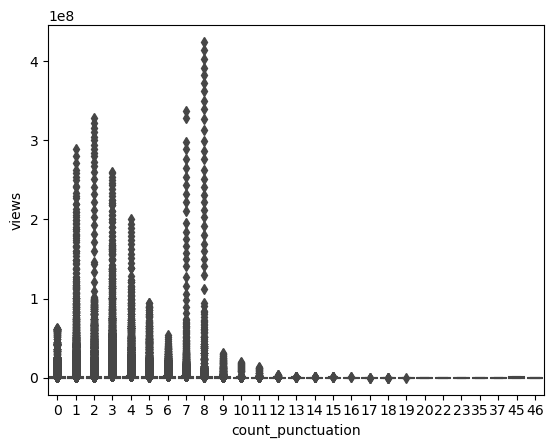

In [78]:
sns.boxplot(x= 'count_punctuation' , y = 'views' , data = full_df)
plt.savefig(r'D:\Full Stack Data Science\Data Analytics Project\Youtube case study\images\count_punctuation.jpeg',dpi = 300)